In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
# Load NYC results
df = pd.read_csv(r'C:\Users\ilker\Desktop\Gig economy project\nyc_monthly_summaries.csv')
print("=== NYC TLC ANALYSIS RESULTS ===")
print(f"Total months analyzed: {len(df)}")
print(f"Date range: {df['year_month'].min()} to {df['year_month'].max()}")
print(f"Total trips processed: {df['total_trips'].sum():,}")


=== NYC TLC ANALYSIS RESULTS ===
Total months analyzed: 16
Date range: 2019-07 to 2025-04
Total trips processed: 4,870,911,798


In [6]:
# Overall statistics (weighted by trip count)
weights = df['total_trips']
total_trips = weights.sum()

avg_gross = (df['avg_gross_hourly'] * weights).sum() / total_trips
avg_net = (df['avg_net_hourly'] * weights).sum() / total_trips
avg_below_min = (df['pct_below_minimum'] * weights).sum() / total_trips

In [7]:
print(f"\n=== WEIGHTED AVERAGES ===")
print(f"Gross hourly rate: ${avg_gross:.2f}")
print(f"Net hourly rate (after costs): ${avg_net:.2f}")
print(f"Percent below $15 minimum: {avg_below_min:.1f}%")



=== WEIGHTED AVERAGES ===
Gross hourly rate: $60.67
Net hourly rate (after costs): $51.09
Percent below $15 minimum: 0.3%


In [8]:
print(f"\n=== WEIGHTED AVERAGES ===")
print(f"Gross hourly rate: ${avg_gross:.2f}")
print(f"Net hourly rate (after costs): ${avg_net:.2f}")
print(f"Percent below $15 minimum: {avg_below_min:.1f}%")



=== WEIGHTED AVERAGES ===
Gross hourly rate: $60.67
Net hourly rate (after costs): $51.09
Percent below $15 minimum: 0.3%


In [10]:
# Yearly comparison
df['year'] = df['year_month'].str[:4].astype(int)
yearly = df.groupby('year').agg({
    'total_trips': 'sum',
    'avg_gross_hourly': lambda x: (x * df.loc[x.index, 'total_trips']).sum() / df.loc[x.index, 'total_trips'].sum(),
    'avg_net_hourly': lambda x: (x * df.loc[x.index, 'total_trips']).sum() / df.loc[x.index, 'total_trips'].sum(),
    'pct_below_minimum': lambda x: (x * df.loc[x.index, 'total_trips']).sum() / df.loc[x.index, 'total_trips'].sum()
})

print(f"\n=== YEARLY TRENDS ===")
for year, row in yearly.iterrows():
    print(f"{year}: Gross ${row['avg_gross_hourly']:.2f}, Net ${row['avg_net_hourly']:.2f}, Below min {row['pct_below_minimum']:.1f}%")



=== YEARLY TRENDS ===
2019: Gross $53.36, Net $45.02, Below min 1.0%
2020: Gross $55.45, Net $46.79, Below min 0.4%
2021: Gross $61.99, Net $53.02, Below min 0.0%
2022: Gross $63.61, Net $54.53, Below min 0.0%
2023: Gross $63.48, Net $53.57, Below min 0.0%
2024: Gross $62.96, Net $51.55, Below min 0.2%
2025: Gross $63.68, Net $52.42, Below min 0.2%


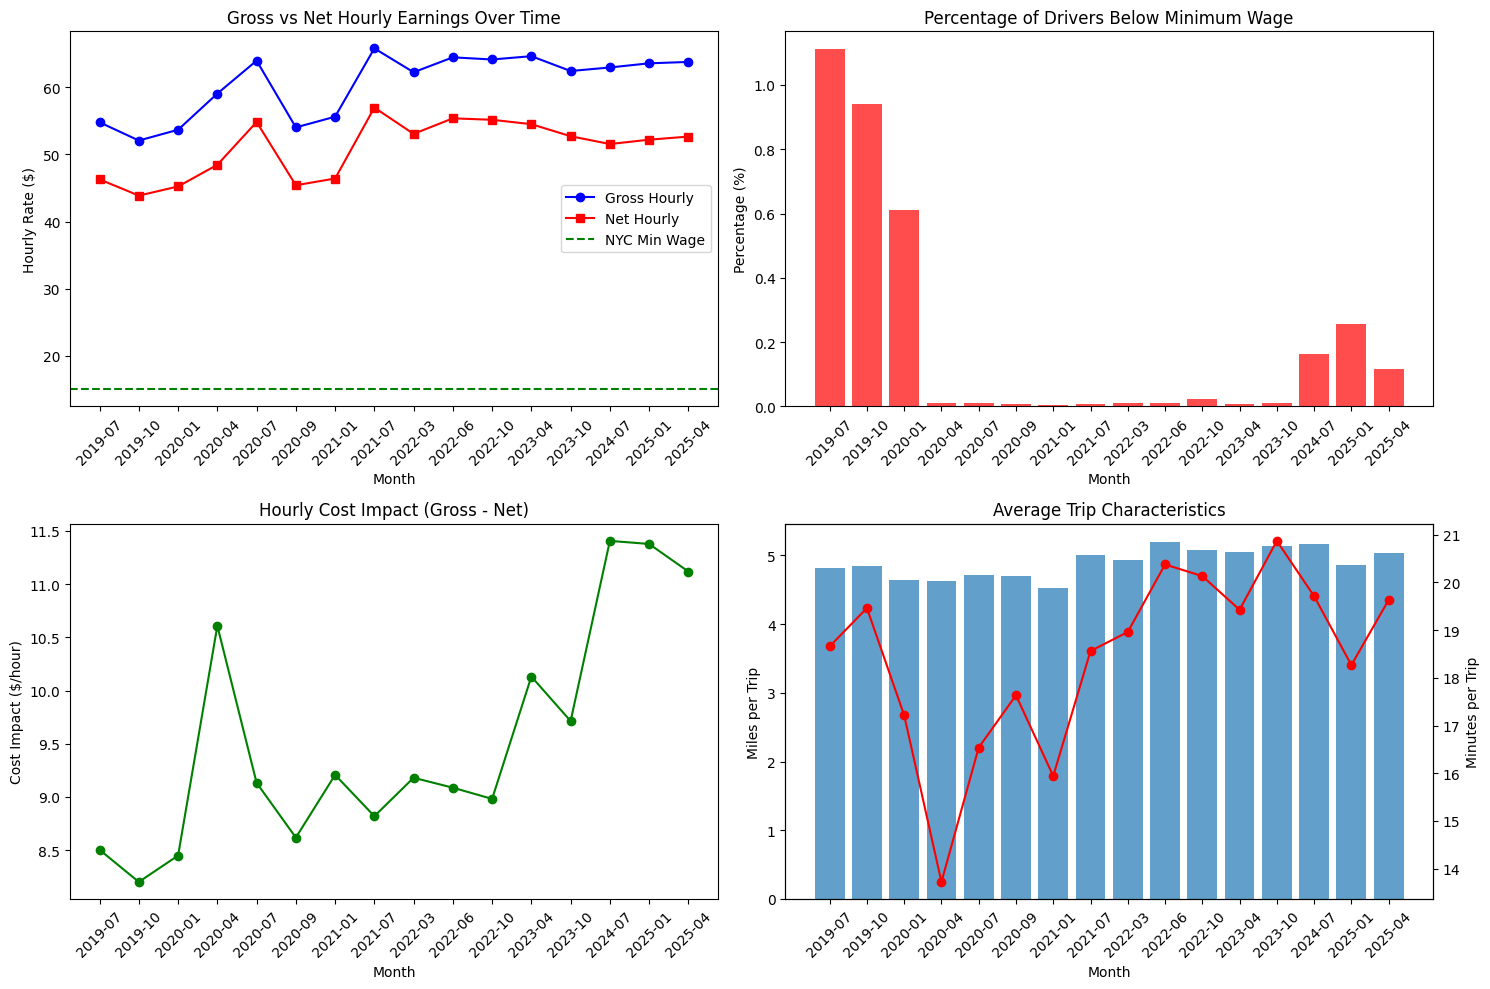

In [11]:

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Gross vs Net hourly over time
ax1 = axes[0, 0]
ax1.plot(df['year_month'], df['avg_gross_hourly'], 'b-', label='Gross Hourly', marker='o')
ax1.plot(df['year_month'], df['avg_net_hourly'], 'r-', label='Net Hourly', marker='s')
ax1.axhline(y=15, color='g', linestyle='--', label='NYC Min Wage')
ax1.set_xlabel('Month')
ax1.set_ylabel('Hourly Rate ($)')
ax1.set_title('Gross vs Net Hourly Earnings Over Time')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# 2. Percentage below minimum wage
ax2 = axes[0, 1]
ax2.bar(df['year_month'], df['pct_below_minimum'], color='red', alpha=0.7)
ax2.set_xlabel('Month')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Percentage of Drivers Below Minimum Wage')
ax2.tick_params(axis='x', rotation=45)

# 3. Cost impact over time
ax3 = axes[1, 0]
df['cost_impact'] = df['avg_gross_hourly'] - df['avg_net_hourly']
ax3.plot(df['year_month'], df['cost_impact'], 'g-', marker='o')
ax3.set_xlabel('Month')
ax3.set_ylabel('Cost Impact ($/hour)')
ax3.set_title('Hourly Cost Impact (Gross - Net)')
ax3.tick_params(axis='x', rotation=45)

# 4. Trip characteristics
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
ax4.bar(df['year_month'], df['avg_trip_miles'], alpha=0.7, label='Avg Miles')
ax4_twin.plot(df['year_month'], df['avg_trip_time_min'], 'r-', marker='o', label='Avg Time (min)')
ax4.set_xlabel('Month')
ax4.set_ylabel('Miles per Trip')
ax4_twin.set_ylabel('Minutes per Trip')
ax4.set_title('Average Trip Characteristics')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('nyc_tlc_analysis_results.png', dpi=300)
plt.show()

In [12]:
# Save final statistics for comparison
final_stats = {
    'total_months': len(df),
    'total_trips': int(total_trips),
    'avg_gross_hourly': round(avg_gross, 2),
    'avg_net_hourly': round(avg_net, 2),
    'pct_below_minimum': round(avg_below_min, 1),
    'earnings_reduction_pct': round((avg_gross - avg_net) / avg_gross * 100, 1)
}

with open('nyc_tlc_final_stats.json', 'w') as f:
    json.dump(final_stats, f, indent=2)

In [13]:
print(f"\n=== KEY FINDINGS ===")
print(f"1. Vehicle costs reduce earnings by {final_stats['earnings_reduction_pct']}%")
print(f"2. {final_stats['pct_below_minimum']:.1f}% of drivers earn below NYC minimum wage AFTER expenses")
print(f"3. Average driver makes ${avg_net:.2f}/hour after all costs")



=== KEY FINDINGS ===
1. Vehicle costs reduce earnings by 15.8%
2. 0.3% of drivers earn below NYC minimum wage AFTER expenses
3. Average driver makes $51.09/hour after all costs


In [14]:
# Comparison with Reddit data
reddit_stats = {
    'avg_hourly_rate': 25.30,
    'median_hourly_rate': 21.50,
    'pct_below_15': 21.6
}

In [15]:
print(f"\n=== NYC vs REDDIT COMPARISON ===")
print(f"Reddit reported average: ${reddit_stats['avg_hourly_rate']:.2f} (likely GROSS)")
print(f"NYC calculated gross: ${avg_gross:.2f}")
print(f"NYC calculated net: ${avg_net:.2f}")
print(f"Gap: Reddit users likely not accounting for ${avg_gross - avg_net:.2f}/hour in costs")


=== NYC vs REDDIT COMPARISON ===
Reddit reported average: $25.30 (likely GROSS)
NYC calculated gross: $60.67
NYC calculated net: $51.09
Gap: Reddit users likely not accounting for $9.58/hour in costs
